In [1]:
import numpy as np
import xarray as xr
import glob
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
ppdir = "/gws/nopw/j04/snapdragon/hkhatri/HighResMIP/NEMO_UAlberta/Memory-ANHA4-EPM111/timeseries/"

ds = xr.open_dataset(ppdir + "Index_AO_NAO.nc")

print(ds)

<xarray.Dataset>
Dimensions:     (mode: 10, lat: 94, lon: 192, time: 744)
Coordinates:
  * mode        (mode) int64 1 2 3 4 5 6 7 8 9 10
  * lat         (lat) float64 -88.54 -86.65 -84.75 -82.85 ... 84.75 86.65 88.54
  * lon         (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time        (time) object 1948-01-31 00:00:00 ... 2009-12-31 00:00:00
    month       (time) int64 ...
Data variables:
    ao_expvar   (mode) float32 ...
    ao_eofs     (mode, lat, lon) float32 ...
    ao_pcs      (mode, time) float32 ...
    nao_expvar  (mode) float32 ...
    nao_eofs    (mode, lat, lon) float32 ...
    nao_pcs     (mode, time) float32 ...


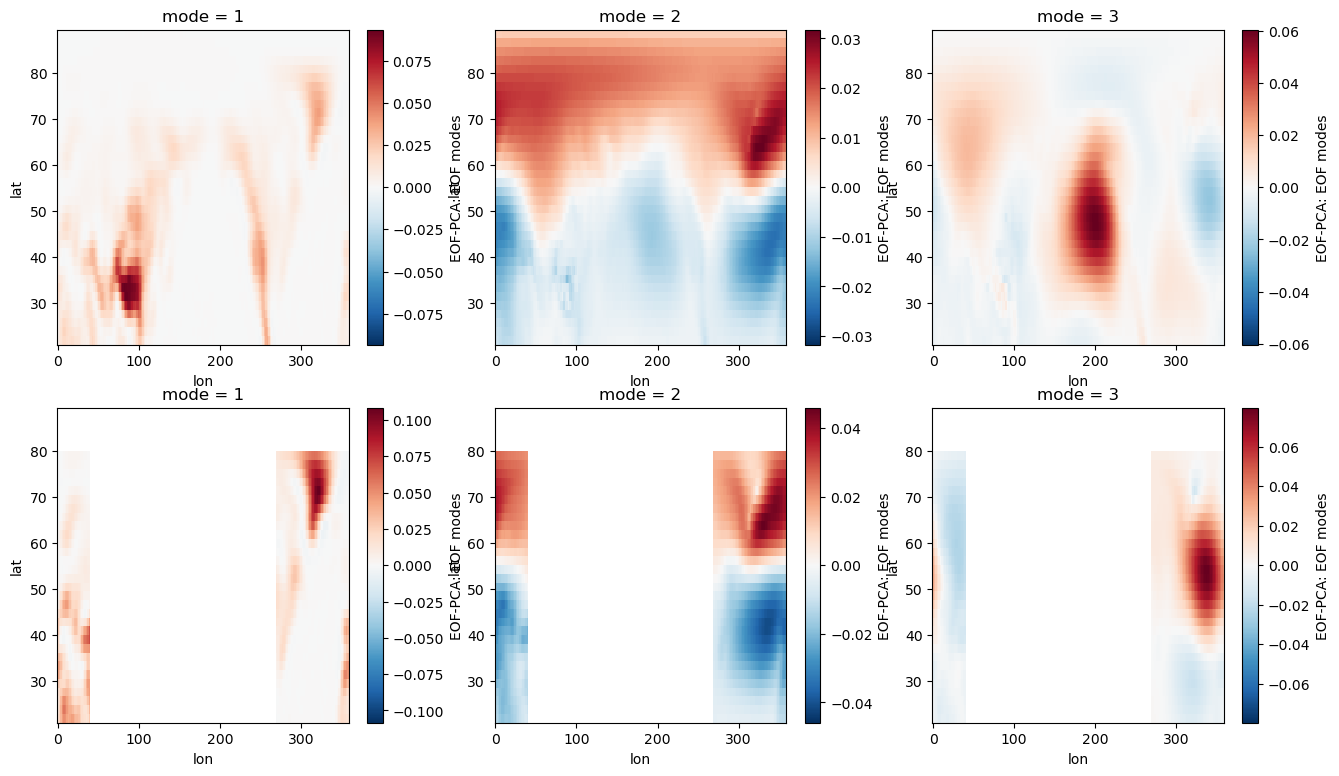

In [3]:
# when combined core2 and ncep data

fig = plt.figure(figsize=[16,9])

for i in range(0,3):
    plt.subplot(2,3,i+1)
    ds['ao_eofs'].isel(mode=i).plot()

for i in range(0,3):
    plt.subplot(2,3,i+4)
    ds['nao_eofs'].isel(mode=i).plot()

In [4]:
print(ds['ao_expvar'].values)

print(ds['nao_expvar'].values)

[9.9240863e-01 1.4595800e-03 7.3438726e-04 6.7109923e-04 5.5606547e-04
 5.1144883e-04 4.5904788e-04 3.4398236e-04 3.1114201e-04 2.3754861e-04]
[9.7863775e-01 6.9705304e-03 3.7109193e-03 2.9612167e-03 1.9496508e-03
 9.6972974e-04 7.4696663e-04 6.3930737e-04 5.0635991e-04 4.1598669e-04]


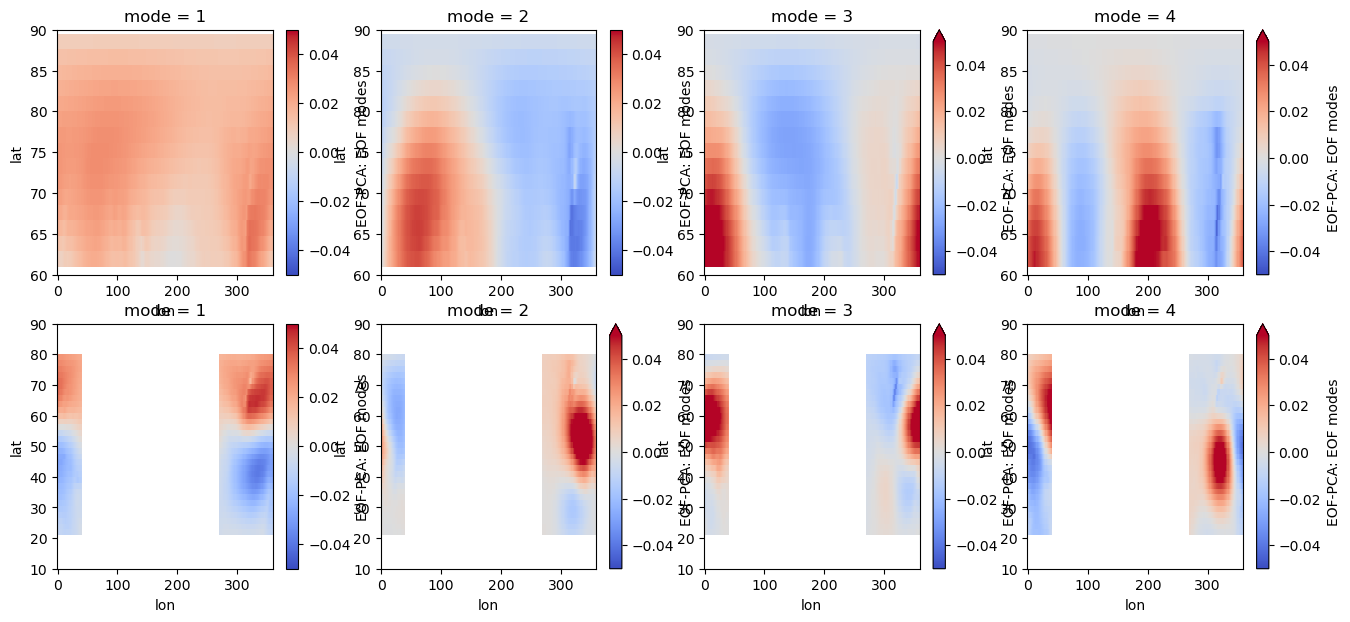

In [14]:
# Data with core2 only

fig = plt.figure(figsize=[16,7])

for i in range(0,4):
    plt.subplot(2,4,i+1)
    ds['ao_eofs'].isel(mode=i).plot(cmap='coolwarm', vmin = -0.05, vmax=0.05)
    plt.ylim([60., 90.])

for i in range(0,4):
    plt.subplot(2,4,i+5)
    ds['nao_eofs'].isel(mode=i).plot(cmap='coolwarm', vmin = -0.05, vmax=0.05)
    plt.ylim([10., 90.])

In [12]:
print("AO Index")
print(ds['ao_expvar'].values * 100.)
print(ds['ao_expvar'].sum().values * 100.)
print(" ")

print("NAO Index")
print(ds['nao_expvar'].values * 100.)
print(ds['nao_expvar'].sum().values * 100.)



AO Index
[36.277218  16.597322  11.948765   7.3326     6.280691   4.5358095
  3.0855787  2.4910758  1.813311   1.3887726]
91.75114035606384
 
NAO Index
[30.534502  16.838642  15.049349   9.173324   5.4676304  3.4751112
  3.3082347  2.6003325  1.9982176  1.5389886]
89.98432755470276


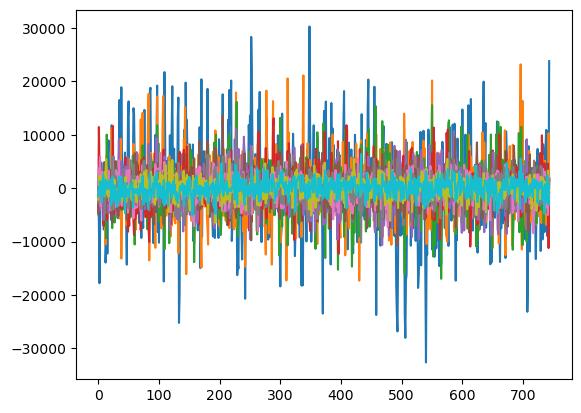

In [9]:
plt.plot(ds['ao_pcs'].transpose())